In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")

In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3196,2019-04-16,5212.810059,5270.759766,5190.810059,5236.259766,5236.259766,194699629
3197,2019-04-17,5236.259766,5317.779785,5232.990234,5289.750000,5289.750000,187312150
3198,2019-04-18,5289.750000,5353.009766,5212.180176,5295.529785,5295.529785,158699049
3199,2019-04-19,5295.529785,5366.600098,5274.450195,5326.180176,5326.180176,123577001
3200,2019-04-20,5326.180176,5348.589844,5232.770020,5305.740234,5305.740234,134681237


In [8]:
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

df.head()
print('done')

done


In [9]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns =df.columns, index=df.index)
df.head()

,Close
Date,
2016-07-25,0.007485
2016-07-26,0.007493
2016-07-27,0.007471
2016-07-28,0.007540
2016-07-29,0.007504


done


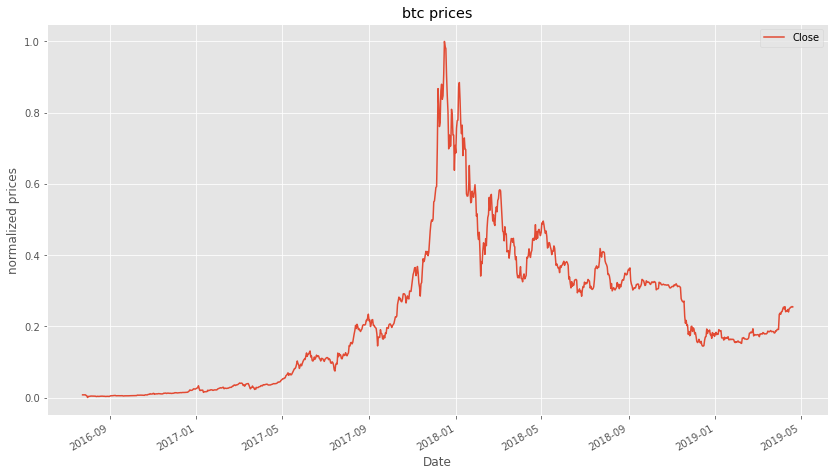

In [10]:
print('done')
df.plot(figsize=(14,8))
plt.title('btc prices')
plt.ylabel('normalized prices')
plt.show()

In [11]:
def split_sequences(seq, n_steps_in, n_steps_out):
    X,y =[], []
    
    for i in range(len(seq)):
        end = i+n_steps_in
        out_end = end+ n_steps_out
        
        if out_end >len(seq):
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [12]:
def visualize_results(results):
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss','loss'])
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy','accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [13]:
n_per_in = 30
n_per_out = 10

n_features = 1

X,y = split_sequences(list(df.Close), n_per_in,n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)
print(y.shape)

(961, 30)
(961, 30, 1)
(961, 10)


In [14]:
model = Sequential()
model.add(LSTM(30, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 30, 10)            1640      
                                                                 
 lstm_2 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_3 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_4 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_5 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 10)                1

In [15]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

In [16]:
res = model.fit(X,y, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 8s 77ms/step - loss: 0.0798 - accuracy: 0.0764 - val_loss: 0.0074 - val_accuracy: 0.0619
Epoch 2/50
27/27 [==============================] - 1s 44ms/step - loss: 0.0479 - accuracy: 0.0741 - val_loss: 0.0048 - val_accuracy: 0.0619
Epoch 3/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0236 - accuracy: 0.0741 - val_loss: 0.0092 - val_accuracy: 0.0825
Epoch 4/50
27/27 [==============================] - 1s 44ms/step - loss: 0.0126 - accuracy: 0.0880 - val_loss: 0.0022 - val_accuracy: 0.0722
Epoch 5/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0096 - accuracy: 0.1111 - val_loss: 0.0018 - val_accuracy: 0.1753
Epoch 6/50
27/27 [==============================] - 1s 44ms/step - loss: 0.0087 - accuracy: 0.1076 - val_loss: 8.0647e-04 - val_accuracy: 0.2577
Epoch 7/50
27/27 [==============================] - 1s 45ms/step - loss: 0.0080 - accuracy: 0.1204 - val_loss: 0.0013 - val_accuracy: 0.2577
Epoch 8/5

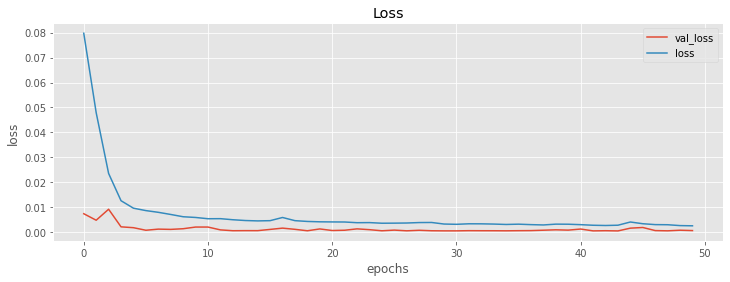

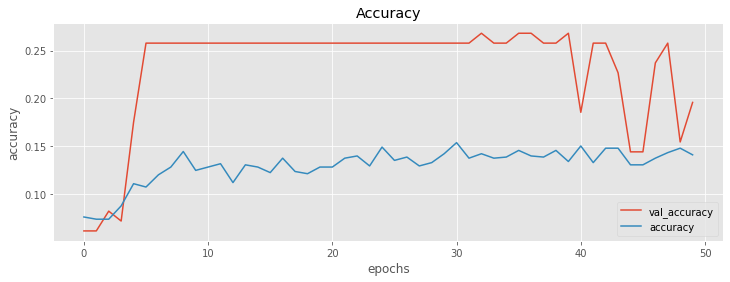

In [17]:
visualize_results(res)

predicted  [[4750.6364194880425], [5123.752683375291], [5015.7321104010625], [4937.134218225135], [4937.776837029588], [5025.3907552178625], [5092.46079565277], [5175.623806916402], [5344.465303226688], [5304.470280307088]]
actuals  [[5081.5], [5080.660156], [5165.589844], [5037.27002], [5212.810059], [5236.259766000001], [5289.750000000001], [5295.529785], [5326.180176], [5305.740234]]


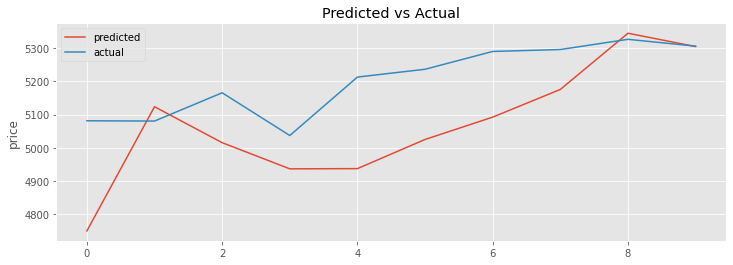

In [18]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("predicted ", yhat)
plt.plot(yhat, label='predicted')

print("actuals ", actual.tolist())
plt.plot(actual.tolist(), label='actual')

plt.title("Predicted vs Actual")
plt.ylabel('price')
plt.legend()
plt.show()

                  Close
2019-04-20  5632.524093
2019-04-21  5974.804196
2019-04-22  5882.644802
2019-04-23  5861.335674
2019-04-24  5806.462763
2019-04-25  5863.317971
2019-04-26  5960.167079
2019-04-27  6024.201096
2019-04-28  6217.856658
2019-04-29  6135.260218


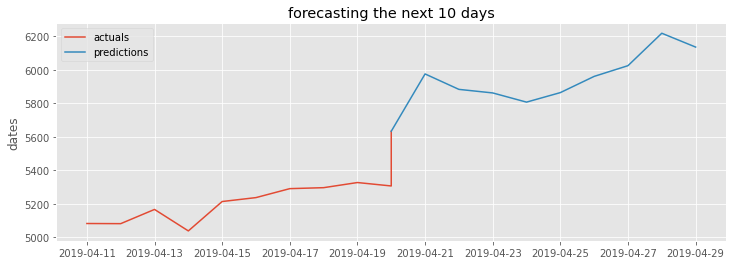

In [19]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in,n_features)).tolist()[0]
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat),freq="D"), columns=df.columns)

print(preds)

periods = 10

actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)), index = df.Close.tail(periods).index, columns = df.columns).append(preds.head(1))

plt.figure(figsize=(12,4))
plt.plot(actual, label='actuals')
plt.plot(preds, label='predictions')
plt.ylabel("price")
plt.ylabel('dates')
plt.title(f'forecasting the next {len(yhat)} days')
plt.legend()
plt.show()